# COGS 109 Final Project

In [36]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as sps
import statistics as stats
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [11]:
#columns we want to use for the model
cols = ['IREDUHIGHST2','CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'HEREVER', 'LSD', 
        'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF','STMANYLIF','CATAG6','NEWRACE2','IRSEX']
#read in dataset using cols list
data = pd.read_csv('NSDUH_2021_Tab.tsv', usecols =cols, sep='\t')

LEGEND
- CIGEVER : EVER SMOKED A CIGARETTE
    - 1 = Yes
    - 2 = No 
- SMKLSSEVR : EVER USED SMOKELESS TOBACCO
    - 1 = Yes
    - 2 = No
    - 94 = DON'T KNOW
    - 97 = REFUSED
- ALCEVER : EVER HAD DRINK OF ALCOHOLIC BEVERAGE
    - 1 = Yes
    - 2 = No
    - 94 = DON'T KNOW
    - 97 = REFUSED
- MJEVER : EVER USED MARIJUANA/HASHISH
    - 1 = Yes
    - 2 = No
    - 3 = Yes LOGICALLY ASSIGNED
    - 85 = BAD DATA Logically assigned
    - 94 = DON'T KNOW
    - 97 = REFUSED
- COCEVER : EVER USED COCAINE
    - 1 = Yes
    - 2 = No
    - 85 = BAD DATA Logically assigned
    - 94 = DON'T KNOW
    - 97 = REFUSED
- HEREVER : EVER USED HEROIN
    - 1 = Yes
    - 2 = No
    - 94 = DON'T KNOW
    - 97 = REFUSED
- LSD : EVER USED LSD
    - 1 = Yes
    - 2 = No 
    - 3 = Yes LOGICALLY ASSIGNED
    - 91 = NEVER USED HALLUCINOGENS
    - 94 = DON'T KNOW 
    - 97 = REFUSED
- AMYLNIT : EVER INHALED AMYL NITRITE, 'POPPERS,' RUSH, ETC.
    - 1 = Yes
    - 2 = No
    - 3 = Yes LOGICALLY ASSIGNED
    - 91 = NEVER USED INHALANTS
    - 94 = DON'T KNOW
    - 97 = REFUSED
- METHAMEVR : EVER USED METHAMPHETAMINE
    - 1 = Yes
    - 2 = No
    - 94 = DON'T KNOW
    - 97 = REFUSED
- PNRANYLIF : ANY PAIN RELIEVER USE IN LIFETIME
    - 1 = Yes
    - 2 = No
    - 5 = Yes LOGICALLY ASSIGNED (from skip pattern)
    - 94 = DON'T KNOW
    - 97 = REFUSED
    - 98 = BLANK (NO ANSWER)
- TRQANYLIF : ANY TRANQUILIZER USE IN LIFETIME
    - 1 = Yes
    - 2 = No
    - 5 = Yes LOGICALLY ASSIGNED (from skip pattern)
    - 94 = DON'T KNOW
    - 97 = REFUSED
    - 98 = BLANK (NO ANSWER)
- STMANYLIF : ANY STIMULANT USE IN LIFETIME
    - 1 = Yes
    - 2 = No
    - 5 = Yes LOGICALLY ASSIGNED (from skip pattern)
    - 94 = DON'T KNOW
    - 97 = REFUSED
    - 98 = BLANK (NO ANSWER)
- IRSEX : IMPUTATION REVISED GENDER
    - 1 = Male 
    - 2 = Female
- IREDUHIGHST2 : EDUCATION - RECODED IMPUTATION REVISED
    - 1 = Fifth grade or less grade completed
    - 2 = Sixth grade completed
    - 3 = Seventh grade completed
    - 4 = Eighth grade completed
    - 5 = Ninth grade completed
    - 6 = Tenth grade completed
    - 7 = Eleventh or Twelfth grade completed, no diploma
    - 8 = High school diploma/GED
    - 9 = Some college credit, but no degree
    - 10 = Associate's degree (for example, AA, AS)
    - 11 = College graduate or higher
- CATAG6 : RC-AGE CATEGORY RECODE (6 LEVELS)
    - 1 = 12-17 Years Old
    - 2 = 18-25 Years Old
    - 3 = 26-34 Years Old
    - 4 = 35-49 Years Old
    - 5 = 50-64 Years Old
    - 6 = 65 or Older
- NEWRACE2 : RC-RACE/HISPANICITY RECODE (7 LEVELS)
    - 1 = NonHisp White
    - 2 = NonHisp Black/Afr Am
    - 3 = NonHisp Native Am/AK Native 
    - 4 = NonHisp Native HI/Other Pac Isl
    - 5 = NonHisp Asian
    - 6 = NonHisp more than one race
    - 7 = Hispanic

In [12]:
#original data shape
data.shape

(58034, 16)

In [13]:
data.head()

,CIGEVER,SMKLSSEVR,ALCEVER,MJEVER,COCEVER,HEREVER,LSD,AMYLNIT,METHAMEVR,PNRANYLIF,TRQANYLIF,STMANYLIF,IRSEX,IREDUHIGHST2,CATAG6,NEWRACE2
0,1,2,1,1,2,2,91,91,2,2,2,2,2,9,3,1
1,1,2,1,2,2,2,91,91,2,2,2,2,1,11,6,1
2,2,2,1,2,2,2,91,91,2,1,5,1,2,11,2,1
3,1,2,1,1,2,2,91,91,2,1,2,2,1,6,4,1
4,2,2,2,2,2,2,91,91,2,5,2,2,1,8,2,7


In [14]:
#create copy of dataset for cleaning/modeling
df = data.copy()

In [60]:
#remove entries that arent yes or no and normalize values that are essentially yes or no
df = df[(df.SMKLSSEVR != 97) & (df.SMKLSSEVR != 94)]
df = df[(df.ALCEVER != 97) & (df.ALCEVER != 94)]
df = df[(df.MJEVER != 97) & (df.MJEVER != 94)| (df.MJEVER != 85)]
df.MJEVER = df.MJEVER.replace(3,1)
df = df[(df.COCEVER != 97) & (df.COCEVER != 94)| (df.COCEVER != 85)]
df = df[(df.HEREVER != 97) & (df.HEREVER != 94)]
df = df[(df.LSD != 97) & (df.LSD != 94)]
df.LSD = df.LSD.replace({91:2,3:1})
df = df[(df.LSD != 97) & (df.LSD != 94)]
df = df[(df.AMYLNIT != 97) & (df.AMYLNIT != 94)]
df.AMYLNIT = df.AMYLNIT.replace({91:2,3:1})
df = df[(df.METHAMEVR != 97) & (df.METHAMEVR != 94)]
df = df[(df.PNRANYLIF != 97) & (df.PNRANYLIF != 94)| (df.PNRANYLIF != 98)]
df.PNRANYLIF = df.PNRANYLIF.replace(5,1)
df = df[(df.TRQANYLIF != 97) & (df.TRQANYLIF != 94)| (df.TRQANYLIF != 98)]
df.TRQANYLIF = df.TRQANYLIF.replace(5,1)
df = df[(df.STMANYLIF != 97) & (df.STMANYLIF != 94)| (df.STMANYLIF != 98)]
df.STMANYLIF = df.STMANYLIF.replace(5,1)
df = df[(df.CATAG6 != 1) & (df.CATAG6 != 2)]
df = df[cols]

In [61]:
#quick look at data
df.head()

,IREDUHIGHST2,CIGEVER,SMKLSSEVR,ALCEVER,MJEVER,COCEVER,HEREVER,LSD,AMYLNIT,METHAMEVR,PNRANYLIF,TRQANYLIF,STMANYLIF,CATAG6,NEWRACE2,IRSEX
0,9,1,2,1,1,2,2,2,2,2,2,2,2,3,1,2
1,11,1,2,1,2,2,2,2,2,2,2,2,2,6,1,1
3,6,1,2,1,1,2,2,2,2,2,1,2,2,4,1,1
5,4,1,2,1,2,2,2,2,2,2,2,2,2,5,7,1
7,11,2,2,1,2,2,2,2,2,2,2,1,1,4,1,2


In [64]:
df.shape

11    14718
8      6716
9      5788
10     3259
7      1102
6       483
5       426
4       261
1       238
2       193
3        80
Name: IREDUHIGHST2, dtype: int64

In [56]:
def plot_complexity_curve(k_list, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = KNeighborsClassifier(n_neighbors=k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

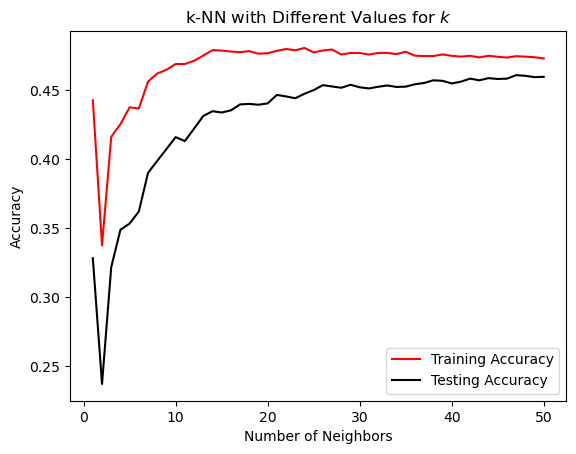

In [65]:
predCols = ['CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'HEREVER', 'LSD', 
        'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF','STMANYLIF','CATAG6','NEWRACE2','IRSEX']
X = df[predCols]
y = df.IREDUHIGHST2
k_list=list(range(1,51))
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=50)
plot_complexity_curve(k_list, X_train, X_test, y_train, y_test)

/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

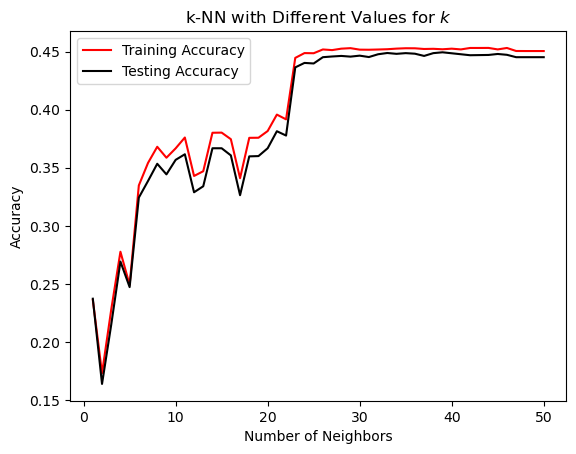

In [63]:
demoCols = ['CATAG6','NEWRACE2','IRSEX']
X = df[demoCols]
y = df.IREDUHIGHST2
k_list=list(range(1,51))
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=50)
plot_complexity_curve(k_list, X_train, X_test, y_train, y_test)

In [75]:
#this cell runs a cross validation test
#WARNING THIS CELL TAKES AN HOUR TO RUN
#Results are pasted into markdown cell below
predCols = ['CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'HEREVER', 'LSD', 
        'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF','STMANYLIF','CATAG6','NEWRACE2','IRSEX']
avgMSElist = []
X = df[predCols]
y = df.IREDUHIGHST2
for i in range(1,25):
        neigh = KNeighborsClassifier(n_neighbors=i)
        mseByFold = []
        for j in range(10):
                X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=j)
                neigh.fit(X_train, y_train)
                y_pred = neigh.predict(X_test)
                mseByFold.append(mean_squared_error(y_pred,y_test))
        avgMSElist.append(sum(mseByFold)/len(mseByFold))


/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [76]:
print(avgMSElist)

[5.114668693429143, 5.774808263663373, 5.979941960892697, 5.480384163615008, 4.8021626476888, 4.4250120914806885, 4.326981275478478, 4.3137290126442345, 4.269874939542596, 4.23011124162233, 4.175464658329303, 4.15575899951634, 4.133489946797485, 4.155150970773164, 4.15478477164375, 4.119380916188765, 4.1138741104124925, 4.074103503074691, 4.099937815242176, 4.116520417328819, 4.103123056726318, 4.0679679403026325, 4.087666689698059, 4.0726317971395005]


[5.114668693429143, 5.774808263663373, 5.979941960892697, 5.480384163615008, 4.8021626476888, 4.4250120914806885, 4.326981275478478, 4.3137290126442345, 4.269874939542596, 4.23011124162233, 4.175464658329303, 4.15575899951634, 4.133489946797485, 4.155150970773164, 4.15478477164375, 4.119380916188765, 4.1138741104124925, 4.074103503074691, 4.099937815242176, 4.116520417328819, 4.103123056726318, 4.0679679403026325, 4.087666689698059, 4.0726317971395005]

Text(0, 0.5, 'Mean Squared Error')

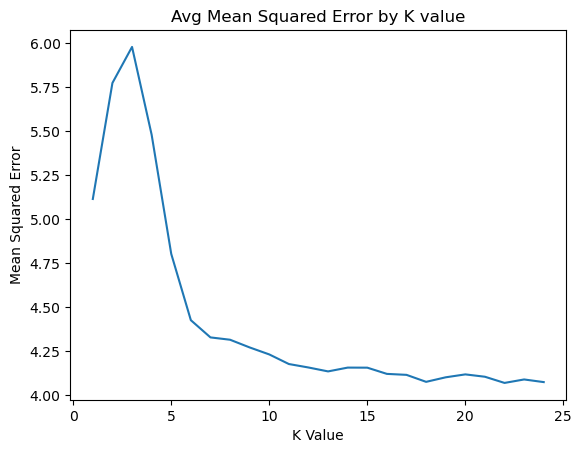

In [6]:
avgMSElist = [5.114668693429143, 5.774808263663373, 5.979941960892697, 5.480384163615008, 4.8021626476888, 4.4250120914806885, 4.326981275478478, 4.3137290126442345, 4.269874939542596, 4.23011124162233, 4.175464658329303, 4.15575899951634, 4.133489946797485, 4.155150970773164, 4.15478477164375, 4.119380916188765, 4.1138741104124925, 4.074103503074691, 4.099937815242176, 4.116520417328819, 4.103123056726318, 4.0679679403026325, 4.087666689698059, 4.0726317971395005]
cntr = list(range(1,25))
plt.plot(cntr,avgMSElist)
plt.title('Avg Mean Squared Error by K value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')

In [8]:
minMSE = 10
for i in avgMSElist:
    if i<minMSE:
        minMSE = i
print(avgMSElist.index(minMSE))
print(minMSE)

21
4.0679679403026325


Best K-Value for model = 22

In [32]:
predCols = ['CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'HEREVER', 'LSD', 
        'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF','STMANYLIF','CATAG6','NEWRACE2','IRSEX']
X = df[predCols]
y = df.IREDUHIGHST2
neigh = KNeighborsClassifier(n_neighbors=22)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=40)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

/Users/danny/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
print(neigh.kneighbors_graph())

  (0, 37352)	1.0
  (0, 20066)	1.0
  (0, 16920)	1.0
  (0, 30712)	1.0
  (0, 15199)	1.0
  (0, 2438)	1.0
  (0, 3450)	1.0
  (0, 217)	1.0
  (0, 861)	1.0
  (0, 2234)	1.0
  (0, 2476)	1.0
  (0, 2987)	1.0
  (0, 2845)	1.0
  (0, 164)	1.0
  (0, 1338)	1.0
  (0, 3990)	1.0
  (0, 4302)	1.0
  (0, 3267)	1.0
  (0, 3147)	1.0
  (0, 1953)	1.0
  (0, 2366)	1.0
  (0, 2185)	1.0
  (1, 1042)	1.0
  (1, 2471)	1.0
  (1, 1835)	1.0
  :	:
  (43417, 6411)	1.0
  (43417, 7860)	1.0
  (43417, 9875)	1.0
  (43418, 984)	1.0
  (43418, 831)	1.0
  (43418, 916)	1.0
  (43418, 656)	1.0
  (43418, 826)	1.0
  (43418, 808)	1.0
  (43418, 879)	1.0
  (43418, 494)	1.0
  (43418, 577)	1.0
  (43418, 268)	1.0
  (43418, 671)	1.0
  (43418, 319)	1.0
  (43418, 790)	1.0
  (43418, 858)	1.0
  (43418, 137)	1.0
  (43418, 387)	1.0
  (43418, 349)	1.0
  (43418, 38)	1.0
  (43418, 552)	1.0
  (43418, 89)	1.0
  (43418, 77)	1.0
  (43418, 68)	1.0


In [41]:
graphDf = X_test.copy()
graphDf['y_test'] = y_test
graphDf['y_pred'] = y_pred
graphDf.reset_index(inplace=True,drop=True)
graphDf['corr_pred'] = np.where(graphDf['y_test']==graphDf['y_pred'],True,False)

In [42]:
graphDf.head()

,CIGEVER,SMKLSSEVR,ALCEVER,MJEVER,COCEVER,HEREVER,LSD,AMYLNIT,METHAMEVR,PNRANYLIF,TRQANYLIF,STMANYLIF,CATAG6,NEWRACE2,IRSEX,y_test,y_pred,corr_pred
0,2,2,1,2,2,2,2,2,2,1,2,1,4,7,1,11,11,True
1,1,2,1,2,2,2,2,2,2,2,2,2,3,1,2,11,11,True
2,1,2,1,1,1,1,1,2,1,1,1,2,4,1,2,6,9,False
3,1,1,1,1,1,2,1,1,2,2,2,1,4,1,2,11,11,True
4,2,2,1,2,2,2,2,2,2,1,2,2,6,2,2,10,11,False


In [44]:
print(graphDf.corr_pred.value_counts())
print(mean_squared_error(y_test,y_pred))

False    9016
True     5457
Name: corr_pred, dtype: int64
4.207282526083051


<AxesSubplot:xlabel='y_pred', ylabel='count'>

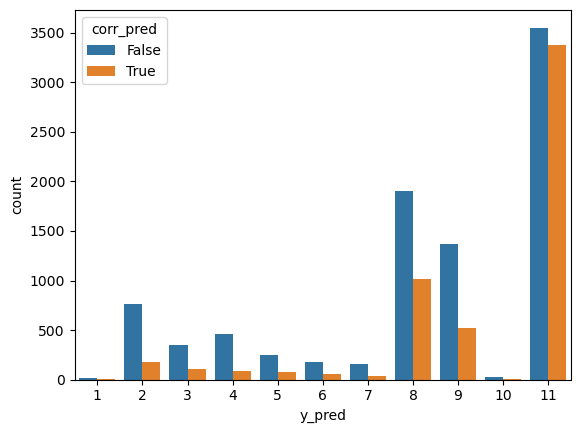

In [48]:
sns.countplot(data=graphDf, x='y_pred',hue='corr_pred')